## DBSCAN Weather Station clustering

https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('weather.csv')

In [4]:
data.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


* Stn_Name === Station Name
* Prov === Province
* Tm === Mean Temperature (°C)
* Tn === Lowest Monthly Minimum Temperature
* Tx === Highest Monthly Maximum Temperature
* DwTm === Days Without Valid Mean Temperature
* DwTx === Days Without Valid Maximum Temperature
* DwTn === Days Without Valid Minimum Temperature
* D === Mean Temperature Difference from Normal
* S === Snowfall (cm)
* DwS === Days Without Snowfall
* S%N === Percent of Normal Snowfall
* P === Total Precipitation (mm)
* DwP === Days Without Valid Precipitation
* P%N === Percent of Normal Precipitation
* Pd === No. of days with precipitation 1mm or More
* BS === Bright Sunshine days
* DwBS === Days Without valid Bright Sunshine
* BS% === Percent of Normal Bright Sunshine
* HDD === Degree Days Below $18^{\circ}$C
* CDD === Degree Days Above $18^{\circ}$C
* Stn_No === Station Number; Climate Station Identifier (1st 3 Digits==Indicate drainage basin, Last 4 Digits Sorting Alphabetically)

In [5]:
data.shape

(1341, 25)

In [6]:
data.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

In [7]:
data.dropna(subset=['Tm', 'Tx', 'Tn'], inplace=True)
print(data.shape)

(1255, 25)


In [8]:
longitude = data['Long']
print(max(longitude))
print(min(longitude))
print()
latitude = data['Lat']
print(max(latitude))
print(min(latitude))

-52.753
-140.868

82.5
41.949


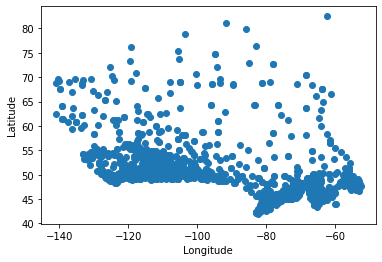

In [9]:
plt.scatter(longitude, latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [10]:
mean_temperature = data['Tm']
min_temperature = data['Tn']
max_temperature = data['Tx']

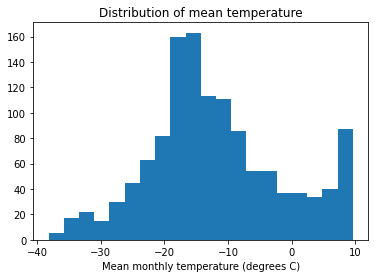

In [11]:
plt.hist(mean_temperature, bins=20)
plt.title('Distribution of mean temperature')
plt.xlabel('Mean monthly temperature (degrees C)')
plt.show()

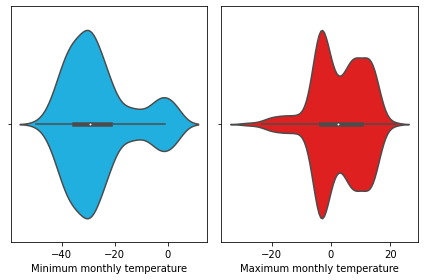

In [12]:
plt.subplot(1,2,1)
sns.violinplot(min_temperature, color='deepskyblue')
plt.xlabel('Minimum monthly temperature')
plt.subplot(1,2,2)
sns.violinplot(max_temperature, color='red')
plt.xlabel('Maximum monthly temperature')
plt.tight_layout()
plt.show()

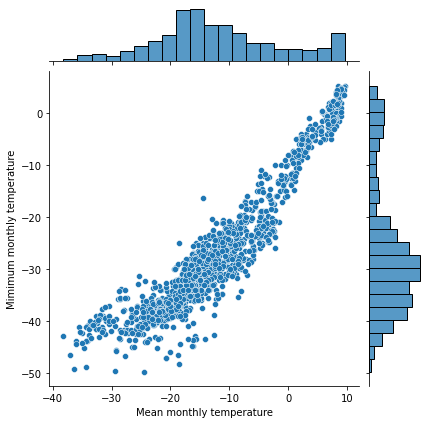

In [13]:
graph = sns.jointplot(mean_temperature, min_temperature)
graph.set_axis_labels('Mean monthly temperature', 'Mimimum monthly temperature')
plt.show()

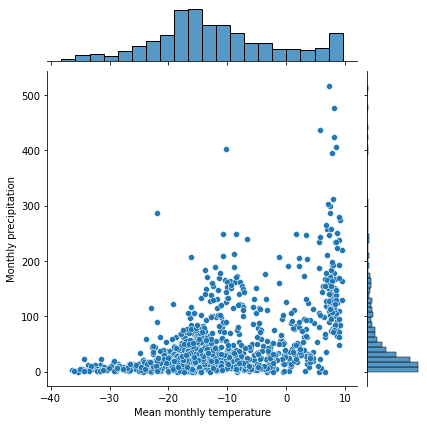

In [14]:
precipitation = data['P']
graph = sns.jointplot(mean_temperature, precipitation)
graph.set_axis_labels('Mean monthly temperature', 'Monthly precipitation')
plt.show()

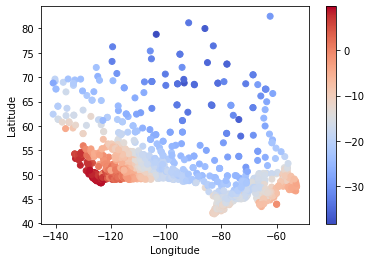

In [15]:
plt.scatter(longitude, latitude, c=mean_temperature, cmap='coolwarm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

In [16]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

### Clustering by temperature

In [17]:
temperature_df = data[['Tm', 'Tn', 'Tx', 'Long', 'Lat']]
temperature_df = StandardScaler().fit_transform(temperature_df)

In [18]:
temperature_df = pd.DataFrame(temperature_df)
temperature_df.columns = ['Tm', 'Tn', 'Tx', 'Long', 'Lat']
temperature_df.head(3)

,Tm,Tn,Tx,Long,Lat
0,1.945059,2.169841,1.227972,-1.141870,-0.383496
1,1.829834,1.852037,1.397484,-1.158617,-0.401355
2,1.810630,1.891763,1.510492,-1.155148,-0.400551


In [19]:
db = DBSCAN(eps=0.3, min_samples=10)

In [20]:
db.fit(temperature_df)
labels = db.labels_
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [21]:
labels2 = []
for i in range(len(labels)):
    labels2.append(labels[i]+1)

In [22]:
set(labels2)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [23]:
data['Cluster'] = labels2

Cluster 0: Average mean temperature = -18.008229426433907 +/- 9.97535652309354
Cluster 1: Average mean temperature = 6.238202247191013 +/- 2.441012205686312
Cluster 2: Average mean temperature = -0.5523809523809524 +/- 0.7594603645691288
Cluster 3: Average mean temperature = -3.244444444444445 +/- 1.11665284679121
Cluster 4: Average mean temperature = -13.748425196850393 +/- 4.335340204107327
Cluster 5: Average mean temperature = -4.153703703703704 +/- 1.3830606107287005
Cluster 6: Average mean temperature = -16.420983606557368 +/- 2.6585375647783906
Cluster 7: Average mean temperature = -10.178947368421053 +/- 1.2237040179494822
Cluster 8: Average mean temperature = -4.371428571428572 +/- 0.7274501175128008


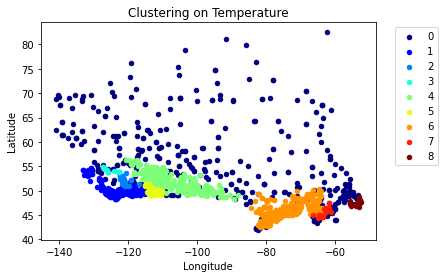

In [24]:
clust_colours = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(set(labels2))))

for clust in set(labels2):
    clust_set = data[data.Cluster == clust]
    clust_long = clust_set['Long']
    clust_lat = clust_set['Lat']
    print(f'Cluster {clust}: Average mean temperature = {np.mean(clust_set.Tm)} +/- {np.std(clust_set.Tm)}')
    plt.scatter(clust_long, clust_lat, color=clust_colours[clust], s=20, label=clust)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering on Temperature')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_score(temperature_df,labels)

0.13427714083792633

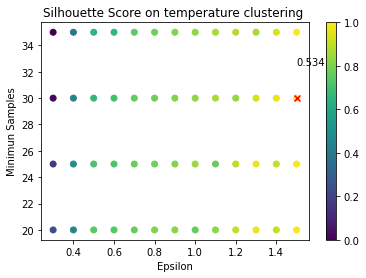

Best results at eps: 1.5 and min samples: 30.0


In [35]:
eps = np.linspace(0,1.5,16).round(2)[3:]
min_samples = np.linspace(15,35,5)[1:]
x, y = [], []
scores = []

for e in eps:
    for s in min_samples:
        db = DBSCAN(eps=e, min_samples=s).fit(temperature_df)
        labels = db.labels_
        x.append(e)
        y.append(s)
        scores.append(silhouette_score(temperature_df,labels))
        
max_score = max(scores)
xpos = x[scores.index(max_score)]
ypos = y[scores.index(max_score)]

plt.scatter(x,y,c=scores)
plt.scatter(xpos,ypos,marker='x',color='red')
plt.text(xpos,ypos+2.5,f'{max_score.round(3)}')
plt.xlabel('Epsilon')
plt.ylabel('Minimun Samples')
plt.title('Silhouette Score on temperature clustering ')
plt.colorbar()
plt.show()

print(f'Best results at eps: {xpos} and min samples: {ypos}')

### Clustering by temperature and precipitation

In [36]:
data.drop(['Cluster'], axis=1, inplace=True)
data.dropna(subset=['P'], inplace=True)

In [37]:
precipitation_df = data[['Long', 'Lat', 'Tm', 'Tn', 'Tm', 'P']]
precipitation_df = StandardScaler().fit_transform(precipitation_df)
precipitation_df = pd.DataFrame(precipitation_df)
precipitation_df.columns = ['Long', 'Lat', 'Tm', 'Tn', 'Tm', 'P']
precipitation_df.head(3)

,Long,Lat,Tm,Tn,Tm,P
0,-1.135948,-0.350253,1.911686,2.125045,1.911686,2.046836
1,-1.152855,-0.369542,1.795448,1.808824,1.795448,3.315886
2,-1.149352,-0.368673,1.776075,1.848352,1.776075,3.411303


In [38]:
db = DBSCAN(eps=0.5, min_samples=10)

In [39]:
db.fit(precipitation_df)
labels = db.labels_

In [40]:
set(labels)

{-1, 0, 1}

In [41]:
labels2 = []
for i in range(len(labels)):
    labels2.append(labels[i]+1)
set(labels2)

{0, 1, 2}

In [42]:
data['Cluster'] = labels2

Cluster 0: Average mean temperature = -13.513913043478258 +/- 14.04918618689985
Cluster 0: Average precipitation = 87.73478260869561 +/- 104.72167463326883
Cluster 1: Average mean temperature = -10.97430786267995 +/- 9.110201645551378
Cluster 1: Average precipitation = 41.01074197120706 +/- 41.772790025238514
Cluster 2: Average mean temperature = -16.729999999999997 +/- 1.5139682955729292
Cluster 2: Average precipitation = 4.279999999999999 +/- 3.947860179894926


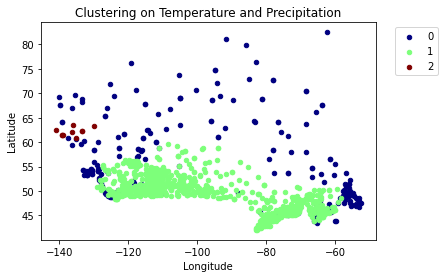

In [43]:
clust_colours = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(set(labels2))))

for clust in set(labels2):
    clust_set = data[data.Cluster == clust]
    clust_long = clust_set['Long']
    clust_lat = clust_set['Lat']
    print(f'Cluster {clust}: Average mean temperature = {np.mean(clust_set.Tm)} +/- {np.std(clust_set.Tm)}')
    print(f'Cluster {clust}: Average precipitation = {np.mean(clust_set.P)} +/- {np.std(clust_set.P)}')
    plt.scatter(clust_long, clust_lat, color=clust_colours[clust], s=20, label=clust)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering on Temperature and Precipitation')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

In [44]:
silhouette_score(precipitation_df,labels)

0.15834710136420563

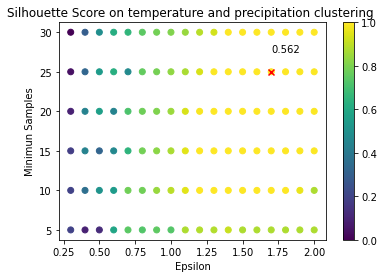

Best results at eps: 1.7 and min samples 25.0


In [45]:
eps = np.linspace(0,2,21).round(2)[3:]
min_samples = np.linspace(5,30,6)
x, y = [], []
scores = []

for e in eps:
    for s in min_samples:
        db = DBSCAN(eps=e, min_samples=s).fit(precipitation_df)
        labels = db.labels_
        x.append(e)
        y.append(s)
        scores.append(silhouette_score(precipitation_df,labels))
        
max_score = max(scores)
xpos = x[scores.index(max_score)]
ypos = y[scores.index(max_score)]

plt.scatter(x,y,c=scores)
plt.scatter(xpos,ypos,marker='x',color='red')
plt.text(xpos,ypos+2.5,f'{max_score.round(3)}')
plt.xlabel('Epsilon')
plt.ylabel('Minimun Samples')
plt.title('Silhouette Score on temperature and precipitation clustering ')
plt.colorbar()
plt.show()

print(f'Best results at eps: {xpos} and min samples {ypos}')
